In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import piplite
await piplite.install('seaborn')
import seaborn as sns

In [4]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')

In [5]:
train_org.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Handling  

In [6]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 653.7+ KB


In [7]:
train_org.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
sp_train = train_org.dropna(axis = 0)

In [9]:
sp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 548.3+ KB


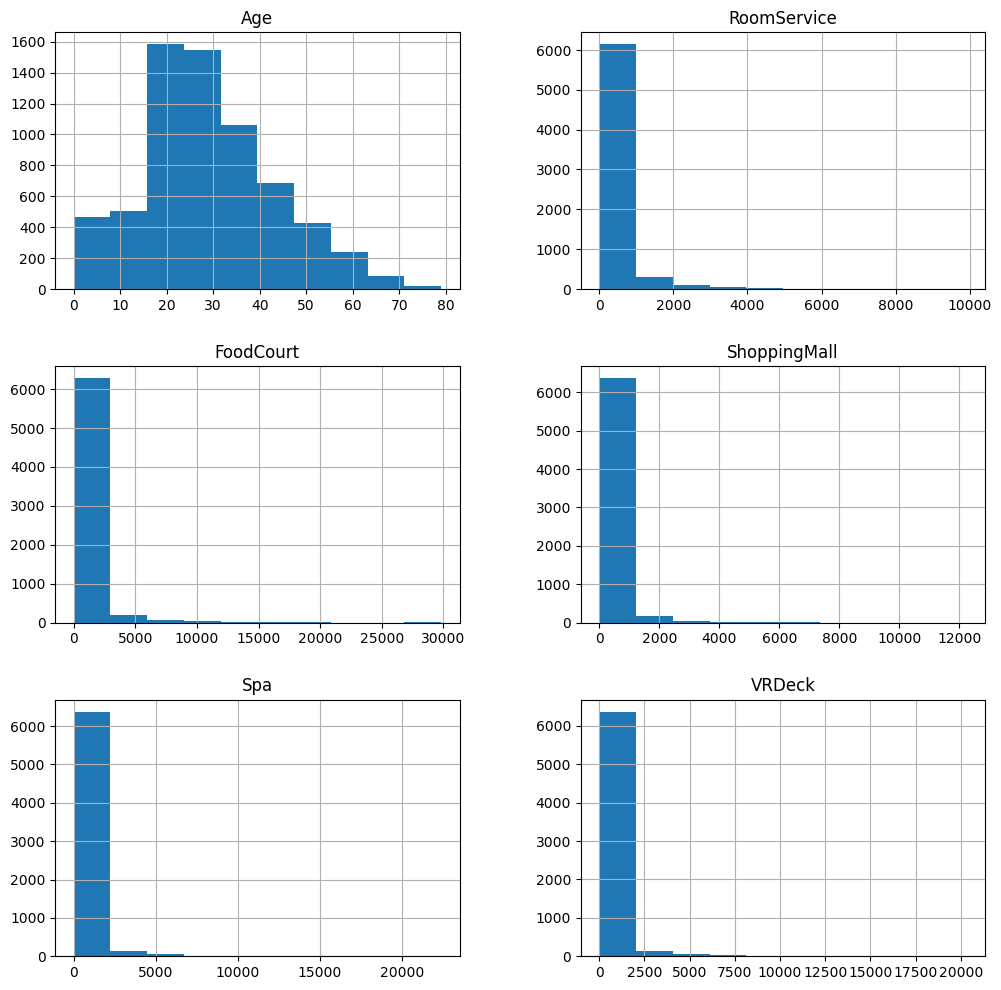

In [11]:
sp_train.hist(figsize = (12, 12))
plt.show()

In [12]:
cat_variables = ['HomePlanet','CryoSleep','Destination','VIP','Transported'
]

In [13]:
data_train = pd.get_dummies(data = sp_train,
                         prefix = cat_variables,
                         columns = cat_variables)

In [14]:
data_train.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Transported_False', 'Transported_True'],
      dtype='object')

In [15]:
data_train.rename(columns = {'Transported_True':'Transported'}, inplace = True)
data_train.rename(columns = {'VIP_True':'VIP'}, inplace = True)
data_train.rename(columns = {'CryoSleep_True':'CryoSleep'}, inplace = True)

In [17]:
y = data_train['Transported']

In [18]:
X = data_train[['Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 
       'CryoSleep', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'VIP']]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   HomePlanet_Earth           6606 non-null   uint8  
 7   HomePlanet_Europa          6606 non-null   uint8  
 8   HomePlanet_Mars            6606 non-null   uint8  
 9   CryoSleep                  6606 non-null   uint8  
 10  Destination_55 Cancri e    6606 non-null   uint8  
 11  Destination_PSO J318.5-22  6606 non-null   uint8  
 12  Destination_TRAPPIST-1e    6606 non-null   uint8  
 13  VIP                        6606 non-null   uint8

In [20]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,0,1,0


In [21]:
X.shape

(6606, 14)

In [22]:
y.shape

(6606,)

In [23]:
len(X)

6606

## Modeling

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5284, 14) (1322, 14) (5284,) (1322,)


In [26]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

print(confusion_matrix(y_val, y_pred))

[[503 150]
 [120 549]]


In [27]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)])

accuracy_score(y_val, y_pred)

[0]	validation_0-logloss:0.58794
[1]	validation_0-logloss:0.52850
[2]	validation_0-logloss:0.49490
[3]	validation_0-logloss:0.47213
[4]	validation_0-logloss:0.45762
[5]	validation_0-logloss:0.44832
[6]	validation_0-logloss:0.44298
[7]	validation_0-logloss:0.43994
[8]	validation_0-logloss:0.43769
[9]	validation_0-logloss:0.43462
[10]	validation_0-logloss:0.43317
[11]	validation_0-logloss:0.43311
[12]	validation_0-logloss:0.43301
[13]	validation_0-logloss:0.43309
[14]	validation_0-logloss:0.43275
[15]	validation_0-logloss:0.43326
[16]	validation_0-logloss:0.43363
[17]	validation_0-logloss:0.43478
[18]	validation_0-logloss:0.43485


0.7957639939485628

In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred)
print(f'The mean square error is: {mse:.2f}')

The mean square error is: 0.20


In [29]:
best_score = xgb_model.best_score
best_int = xgb_model.best_iteration
best_ntree = xgb_model.best_ntree_limit

In [30]:
best_score

0.4327540840304058

In [32]:
best_int

14

In [33]:
best_ntree

15

In [35]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       653
           1       0.79      0.82      0.80       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



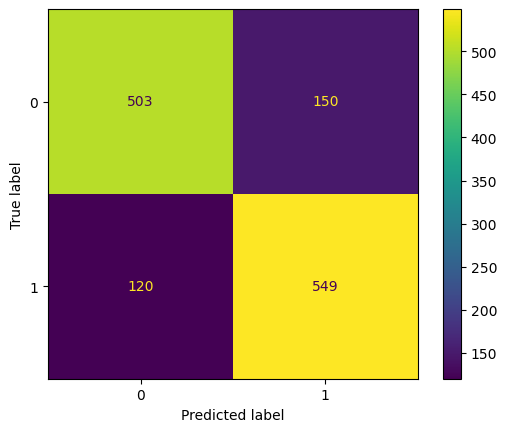

In [36]:
cm = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [37]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 317.5+ KB


In [38]:
test_org.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [39]:
cat_variables_test = ['HomePlanet','CryoSleep','Destination','VIP'
]

In [40]:
data_test = pd.get_dummies(data = test_org,
                         prefix = cat_variables_test,
                         columns = cat_variables_test)



In [41]:
data_test.rename(columns = {'VIP_True':'VIP'}, inplace = True)
data_test.rename(columns = {'CryoSleep_True':'CryoSleep'}, inplace = True)

In [42]:
X_test = data_test[['Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 
       'CryoSleep', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'VIP']]

In [43]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,0,1,0


In [44]:
y_test = pd.Series(xgb_model.predict(X_test)).map({0:False, 1:True})

In [45]:
y_test

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273    False
4274     True
4275     True
4276    False
Length: 4277, dtype: bool

In [46]:
submission = pd.DataFrame()

In [48]:
submission['PassengerId'] = test_org['PassengerId']
submission['Transported'] = y_test

In [49]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [51]:
submission = pd.DataFrame({'PassengerId': submission.PassengerId, 'Transported': submission.Transported})
submission.to_csv('submission.csv', index=False)